# DeepImpute For Saver Dataset

Mouse brain single-cell RNA-seq dataset

In [2]:
import sys
sys.path.append('/Users/juank/Desktop/BCOM/Proyecto/deepimpute')

from deepimpute.multinet import MultiNet
import pandas as pd

# Load dataset using pandas
data = pd.read_csv('/Users/juank/Desktop/BCOM/Proyecto/deepimpute/data/linnarsson.csv',index_col=0)
print('Working on {} cells and {} genes'.format(*data.shape))

Working on 3529 cells and 200 genes


In [3]:
data

,1772071015_C02,1772071017_G12,1772071017_A05,1772071014_B06,1772067065_H06,1772071017_E02,1772067065_B07,1772067060_B09,1772071014_E04,1772071015_D04,...,1772067076_E04,1772066097_C06,1772067057_D12,1772066100_A05,1772071015_A11,1772071015_C09,1772062128_F10,1772071017_H06,1772071014_A12,1772063077_H05
Atp1b2,9,5,8,6,7,9,0,3,6,4,...,2,0,2,1,2,7,1,10,3,1
Sub1,28,41,57,33,30,13,27,17,23,31,...,49,26,47,16,18,27,44,5,23,18
Ptprf,0,0,4,1,5,2,0,4,0,10,...,1,1,3,0,1,7,7,0,2,0
Cers5,0,0,7,1,0,1,2,0,0,0,...,3,0,13,2,0,2,3,3,4,1
Rit2,2,6,3,1,12,2,2,2,10,7,...,2,9,2,0,6,3,5,11,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Eif1ax,1,1,2,1,1,1,0,0,0,1,...,2,5,4,2,0,0,1,1,3,3
Rbbp7,1,2,4,4,6,4,6,8,3,4,...,1,4,4,0,2,2,0,2,1,0
Trappc2,1,1,2,1,2,0,0,0,1,1,...,5,6,5,2,1,2,1,0,4,0
Rab9,7,1,1,3,0,0,2,0,0,0,...,1,2,3,2,0,6,2,2,2,3


## Create a DeepImpute multinet

In [4]:
# Using default parameters
multinet = MultiNet() 

Using all the cores (12)


In [5]:
# Using custom parameters
NN_params = {
        'learning_rate': 1e-4,
        'batch_size': 64,
        'max_epochs': 200,
        'ncores': 5,
        'sub_outputdim': 512,
        'architecture': [
            {"type": "dense", "activation": "relu", "neurons": 200},
            {"type": "dropout", "activation": "dropout", "rate": 0.3}]
    }

multinet = MultiNet(**NN_params)

## Fit the networks

In [6]:
# Using all the data
multinet.fit(data,cell_subset=1,minVMR=0.5)

Input dataset is 3529 cells (rows) and 200 genes (columns)
First 3 rows and columns:
        1772071015_C02  1772071017_G12  1772071017_A05
Atp1b2               9               5               8
Sub1                28              41              57
Ptprf                0               0               4
512 genes selected for imputation
Net 0: 200 predictors, 512 targets
Normalization
Building network
[{'type': 'dense', 'activation': 'relu', 'neurons': 200}, {'type': 'dropout', 'activation': 'dropout', 'rate': 0.3}]
Fitting with 3529 cells


/Users/juank/Desktop/BCOM/Proyecto/deepimpute/deepimpute/multinet.py:355: UserWarning: Warning: number of target genes lower than output dim. Consider lowering down the sub_outputdim parameter
  warnings.warn('Warning: number of target genes lower than output dim. Consider lowering down the sub_outputdim parameter',


Epoch 1/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.5542 - val_loss: 1.0937
Epoch 2/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - loss: 1.3908 - val_loss: 0.5106
Epoch 3/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8878 - val_loss: 0.4085
Epoch 4/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 0.7230 - val_loss: 0.3786
Epoch 5/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6502 - val_loss: 0.3582
Epoch 6/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5923 - val_loss: 0.3459
Epoch 7/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5571 - val_loss: 0.3305
Epoch 8/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5315 - val_loss: 0.3192
Epoch 9/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5020 - val_loss: 0.3093
Epoch 10/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4790 - val_loss: 0.3065
Epoch 11/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4692 - val_loss: 0.3008
Epoch 12/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss:

Stopped fitting after 132 epochs
Saved model to disk in /var/folders/t1/fw_bh5nj2sg1zsn8ft2cld2c0000gn/T/tmp_zbrc5la
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [6]:
# Using 80% of the data
multinet.fit(data,cell_subset=0.5)

Input dataset is 500 cells (rows) and 3000 genes (columns)
First 3 rows and columns:
                  ENSG00000177954  ENSG00000197756  ENSG00000231500
AATTGTGACTACGA-1            826.0            674.0            694.0
TGACACGATTCGTT-1            617.0            618.0            594.0
TGTCAGGATTGTCT-1            525.0            550.0            540.0
3072 genes selected for imputation
Net 0: 847 predictors, 512 targets
Net 1: 839 predictors, 512 targets
Net 2: 842 predictors, 512 targets
Net 3: 840 predictors, 512 targets
Net 4: 820 predictors, 512 targets
Net 5: 766 predictors, 512 targets
Normalization
Building network
[{'type': 'dense', 'activation': 'relu', 'neurons': 200}, {'type': 'dropout', 'activation': 'dropout', 'rate': 0.3}]
Fitting with 250 cells
Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 30.1276 - val_loss: 25.0546
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26.7142 - val_loss: 21.8920
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss:

Saved model to disk in /var/folders/t1/fw_bh5nj2sg1zsn8ft2cld2c0000gn/T/tmpt3c3oytw
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [7]:
# Using 200 cells (randomly selected)
multinet.fit(data,cell_subset=200)

Input dataset is 500 cells (rows) and 3000 genes (columns)
First 3 rows and columns:
                  ENSG00000177954  ENSG00000197756  ENSG00000231500
AATTGTGACTACGA-1            826.0            674.0            694.0
TGACACGATTCGTT-1            617.0            618.0            594.0
TGTCAGGATTGTCT-1            525.0            550.0            540.0
3072 genes selected for imputation
Net 0: 907 predictors, 512 targets
Net 1: 912 predictors, 512 targets
Net 2: 905 predictors, 512 targets
Net 3: 923 predictors, 512 targets
Net 4: 898 predictors, 512 targets
Net 5: 848 predictors, 512 targets
Normalization
Building network
[{'type': 'dense', 'activation': 'relu', 'neurons': 200}, {'type': 'dropout', 'activation': 'dropout', 'rate': 0.3}]
Fitting with 200 cells
Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 29.5517 - val_loss: 24.5187
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 26.7996 - val_loss: 22.2365
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss:

Saved model to disk in /var/folders/t1/fw_bh5nj2sg1zsn8ft2cld2c0000gn/T/tmpt3c3oytw
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [7]:
# Custom fit
trainingData = data.iloc[100:250,:]
multinet.fit(trainingData)

Input dataset is 150 cells (rows) and 3000 genes (columns)
First 3 rows and columns:
                  ENSG00000177954  ENSG00000197756  ENSG00000231500
AATACCCTGGGACA-1            271.0            262.0            231.0
GGCGCATGCCTAAG-1            173.0            390.0            358.0
CGCACTTGAACCAC-1            367.0            406.0            354.0
3072 genes selected for imputation
Net 0: 1252 predictors, 512 targets
Net 1: 1263 predictors, 512 targets
Net 2: 1250 predictors, 512 targets
Net 3: 1273 predictors, 512 targets
Net 4: 1253 predictors, 512 targets
Net 5: 1251 predictors, 512 targets
Normalization
Building network
[{'type': 'dense', 'activation': 'relu', 'neurons': 200}, {'type': 'dropout', 'activation': 'dropout', 'rate': 0.3}]
Fitting with 150 cells
Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 29.6420 - val_loss: 26.1024
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 26.4871 - val_loss: 23.0008
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 

Saved model to disk in /var/folders/t1/fw_bh5nj2sg1zsn8ft2cld2c0000gn/T/tmpy1yo7oy8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


## Imputation

The imputation can be done on any dataset as long as the gene labels are the same

In [7]:
imputedData = multinet.predict(data)

111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
Filling zeros


/Users/juank/Desktop/BCOM/Proyecto/deepimpute/deepimpute/multinet.py:287: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  predicted = predicted.groupby(by=predicted.columns, axis=1).mean()


In [10]:
imputedData

,1772071015_C02,1772071017_G12,1772071017_A05,1772071014_B06,1772067065_H06,1772071017_E02,1772067065_B07,1772067060_B09,1772071014_E04,1772071015_D04,...,1772067076_E04,1772066097_C06,1772067057_D12,1772066100_A05,1772071015_A11,1772071015_C09,1772062128_F10,1772071017_H06,1772071014_A12,1772063077_H05
Atp1b2,9.000000,5.000000,8.0,6.000000,7.000000,9.00000,5.848970,3.000000,6.000000,4.000000,...,2.000000,1.812623,2.000000,1.000000,2.000000,7.000000,1.000000,10.000000,3.0,1.000000
Sub1,28.000000,41.000000,57.0,33.000000,30.000000,13.00000,27.000000,17.000000,23.000000,31.000000,...,49.000000,26.000000,47.000000,16.000000,18.000000,27.000000,44.000000,5.000000,23.0,18.000000
Ptprf,2.459806,2.572126,4.0,1.000000,5.000000,2.00000,3.430110,4.000000,3.047349,10.000000,...,1.000000,1.000000,3.000000,1.978819,1.000000,7.000000,7.000000,2.620672,2.0,2.210549
Cers5,2.331866,2.110072,7.0,1.000000,2.596802,1.00000,2.000000,2.425081,2.301092,1.966174,...,3.000000,2.428072,13.000000,2.000000,1.749489,2.000000,3.000000,3.000000,4.0,1.000000
Rit2,2.000000,6.000000,3.0,1.000000,12.000000,2.00000,2.000000,2.000000,10.000000,7.000000,...,2.000000,9.000000,2.000000,2.237396,6.000000,3.000000,5.000000,11.000000,2.0,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Eif1ax,1.000000,1.000000,2.0,1.000000,1.000000,1.00000,1.932763,1.650007,2.051389,1.000000,...,2.000000,5.000000,4.000000,2.000000,1.397483,1.593345,1.000000,1.000000,3.0,3.000000
Rbbp7,1.000000,2.000000,4.0,4.000000,6.000000,4.00000,6.000000,8.000000,3.000000,4.000000,...,1.000000,4.000000,4.000000,1.593816,2.000000,2.000000,1.761967,2.000000,1.0,1.115924
Trappc2,1.000000,1.000000,2.0,1.000000,2.000000,1.48901,1.441501,1.614896,1.000000,1.000000,...,5.000000,6.000000,5.000000,2.000000,1.000000,2.000000,1.000000,1.245944,4.0,3.220298
Rab9,7.000000,1.000000,1.0,3.000000,1.864262,1.79712,2.000000,1.614426,1.888468,1.621606,...,1.000000,2.000000,3.000000,2.000000,0.863343,6.000000,2.000000,2.000000,2.0,3.000000


## Visualization

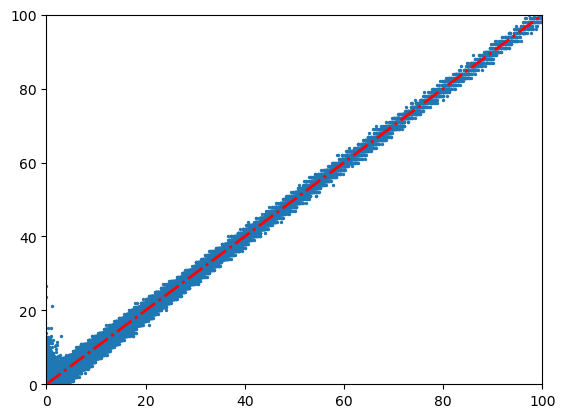

In [8]:
import matplotlib.pyplot as plt
import numpy as np

limits = [0,100]

fig,ax = plt.subplots()

jitter = np.random.normal(0,1,data.size) # Add some jittering to better see the point density
ax.scatter(data.values.flatten()+jitter,imputedData.values.flatten(),s=2)
ax.plot(limits,limits,'r-.',linewidth=2)
ax.set_xlim(limits)
ax.set_ylim(limits)

plt.show()


## Scoring
Display training metrics (MSE and Pearson's correlation on the test data)

In [9]:
multinet.test_metrics

{'correlation': 0.8493194898683453, 'MSE': 0.16082680781214634}